### Import Relevant Packages

In [6]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
# Import dataset

data = pd.read_json('schoolInfo.json')

In [8]:
data.head()

,rankingNoteText,nonResponderText,nonResponder,act-avg,primaryPhoto,primaryPhotoThumb,sat-avg,enrollment,city,sortName,...,displayName,schoolType,region,aliasNames,rankingType,overallRank,institutionalControl,rankingMaxPossibleScore,rankingRankStatus,primaryKey
0,NaN,None,False,32.0,https://www.usnews.com/img/college-photo_31291...,https://www.usnews.com/img/college-photo_31291...,1400.0,5400.0,Princeton,princetonuniversity,...,Princeton University,national-universities,NaN,None,national-universities,1,private,NaN,ranked,2627
1,NaN,None,False,32.0,https://www.usnews.com/img/college-photo_8866.jpg,https://www.usnews.com/img/college-photo_8866_...,1430.0,6710.0,Cambridge,harvarduniversity,...,Harvard University,national-universities,NaN,None,national-universities,2,private,NaN,ranked,2155
2,NaN,None,False,32.0,https://www.usnews.com/dims4/USNEWS/5b128f0/17...,https://www.usnews.com/dims4/USNEWS/196469f/17...,1450.0,5941.0,Chicago,universityofchicago,...,University of Chicago,national-universities,NaN,UChicago,national-universities,3,private,NaN,ranked,1774
3,NaN,None,False,32.0,https://www.usnews.com/dims4/USNEWS/60348dd/17...,https://www.usnews.com/dims4/USNEWS/1ca230f/17...,1420.0,5472.0,New Haven,yaleuniversity,...,Yale University,national-universities,NaN,None,national-universities,3,private,NaN,ranked,1426
4,NaN,None,False,32.0,https://www.usnews.com/img/college-photo_19002...,https://www.usnews.com/img/college-photo_19002...,1430.0,6113.0,New York,columbiauniversity,...,Columbia University,national-universities,NaN,None,national-universities,5,private,NaN,ranked,2707


In [9]:
# Check the number of rows and features in data

data.shape

(311, 39)

### Data Preparation

check for missing data

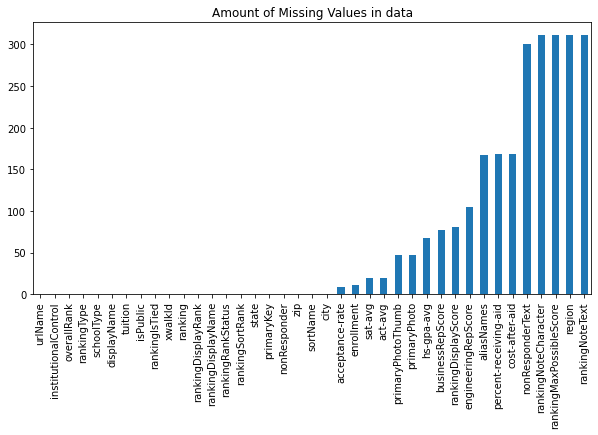

In [10]:
data.isna().sum().sort_values().plot(kind='bar', figsize=(10,5), title='Amount of Missing Values in data')
plt.show()

In [11]:
# Drop columns that have 60% or more missing values

to_drop = [col for col in data.columns if data[col].isna().sum() >= data.shape[0] * 0.6]

In [12]:
data.drop(columns=to_drop, inplace=True)

In [13]:
data.columns

Index(['nonResponder', 'act-avg', 'primaryPhoto', 'primaryPhotoThumb',
       'sat-avg', 'enrollment', 'city', 'sortName', 'zip', 'acceptance-rate',
       'rankingDisplayScore', 'percent-receiving-aid', 'cost-after-aid',
       'state', 'rankingSortRank', 'hs-gpa-avg', 'urlName',
       'rankingDisplayName', 'rankingDisplayRank', 'ranking', 'xwalkId',
       'rankingIsTied', 'isPublic', 'businessRepScore', 'tuition',
       'engineeringRepScore', 'displayName', 'schoolType', 'aliasNames',
       'rankingType', 'overallRank', 'institutionalControl',
       'rankingRankStatus', 'primaryKey'],
      dtype='object')

There are 34 columns left in the data, some of which are redundant.



In [14]:
univ=data.groupby(['state','institutionalControl']).size()

In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

pd.set_option('display.max_colwidth', -1)

In [16]:
data.head()

,nonResponder,act-avg,primaryPhoto,primaryPhotoThumb,sat-avg,enrollment,city,sortName,zip,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,state,rankingSortRank,hs-gpa-avg,urlName,rankingDisplayName,rankingDisplayRank,ranking,xwalkId,rankingIsTied,isPublic,businessRepScore,tuition,engineeringRepScore,displayName,schoolType,aliasNames,rankingType,overallRank,institutionalControl,rankingRankStatus,primaryKey
0,False,32.0,https://www.usnews.com/img/college-photo_31291.jpg,https://www.usnews.com/img/college-photo_31291_170x170mm.jpg,1400.0,5400.0,Princeton,princetonuniversity,8544,7.0,100.0,60.0,16793.0,NJ,1,3.9,princeton-university,National Universities,#1,overall,186131,False,True,NaN,47140,4.1,Princeton University,national-universities,None,national-universities,1,private,ranked,2627
1,False,32.0,https://www.usnews.com/img/college-photo_8866.jpg,https://www.usnews.com/img/college-photo_8866_170x170mm.jpg,1430.0,6710.0,Cambridge,harvarduniversity,2138,5.0,98.0,55.0,16338.0,MA,2,4.0,harvard-university,National Universities,#2,overall,166027,False,True,NaN,48949,3.6,Harvard University,national-universities,None,national-universities,2,private,ranked,2155
2,False,32.0,https://www.usnews.com/dims4/USNEWS/5b128f0/17177859217/resize/800x540/quality/85/?url=www.usnews.com%2Fcmsmedia%2F97%2Fa2%2F70c471924fa1ae47788aafc952b4%2F160727-univerity-of-chicago-hero-stock.jpg,https://www.usnews.com/dims4/USNEWS/196469f/17177859217/resize/170x170/quality/85/?url=www.usnews.com%2Fcmsmedia%2F97%2Fa2%2F70c471924fa1ae47788aafc952b4%2F160727-univerity-of-chicago-hero-stock.jpg,1450.0,5941.0,Chicago,universityofchicago,60637,8.0,96.0,42.0,27767.0,IL,3,4.0,university-of-chicago,National Universities,#3,overall,144050,True,True,NaN,54825,NaN,University of Chicago,national-universities,UChicago,national-universities,3,private,ranked,1774
3,False,32.0,https://www.usnews.com/dims4/USNEWS/60348dd/17177859217/resize/800x540/quality/85/?url=www.usnews.com%2Fcmsmedia%2F63%2F64%2Facbcdd85417f8f9d141439d4a505%2F160727-yale-university-hero-stock.jpg,https://www.usnews.com/dims4/USNEWS/1ca230f/17177859217/resize/170x170/quality/85/?url=www.usnews.com%2Fcmsmedia%2F63%2F64%2Facbcdd85417f8f9d141439d4a505%2F160727-yale-university-hero-stock.jpg,1420.0,5472.0,New Haven,yaleuniversity,6520,6.0,96.0,50.0,18385.0,CT,3,NaN,yale-university,National Universities,#3,overall,130794,True,True,NaN,51400,3.4,Yale University,national-universities,None,national-universities,3,private,ranked,1426
4,False,32.0,https://www.usnews.com/img/college-photo_19002.jpg,https://www.usnews.com/img/college-photo_19002_170x170mm.jpg,1430.0,6113.0,New York,columbiauniversity,10027,6.0,95.0,48.0,21041.0,NY,5,NaN,columbia-university,National Universities,#5,overall,190150,True,True,NaN,57208,3.8,Columbia University,national-universities,None,national-universities,5,private,ranked,2707


In [17]:
#Public, Private and proproetary Universities per each state

univ

state  institutionalControl
AK     public                  1 
AL     public                  5 
AR     public                  2 
AZ     proprietary             3 
       public                  3 
CA     private                 12
       proprietary             2 
       public                  13
CO     private                 1 
       public                  5 
CT     private                 2 
       public                  1 
DC     private                 5 
DE     private                 1 
       public                  1 
FL     private                 4 
       public                  8 
GA     private                 3 
       public                  8 
HI     public                  1 
IA     public                  2 
ID     public                  3 
IL     private                 8 
       public                  5 
IN     private                 1 
       public                  5 
KS     public                  3 
KY     private                 2 
       public       

In [18]:
# Remove columns that won't be needed for the analysis

data.drop(columns=['nonResponder', 'primaryPhoto', 'primaryPhotoThumb', 'sortName', 'zip', 'urlName',
                   'rankingDisplayRank', 'ranking', 'xwalkId',  'rankingIsTied', 'isPublic', 'primaryKey',
                   'businessRepScore', 'schoolType', 'aliasNames', 'rankingType', 'overallRank','rankingSortRank',
                   'rankingRankStatus', 'rankingDisplayName', 'institutionalControl'
                  ],inplace=True)

### Exploratory Data Analysis (EDA)

In [19]:
data.head()

,act-avg,sat-avg,enrollment,city,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,state,hs-gpa-avg,tuition,engineeringRepScore,displayName
0,32.0,1400.0,5400.0,Princeton,7.0,100.0,60.0,16793.0,NJ,3.9,47140,4.1,Princeton University
1,32.0,1430.0,6710.0,Cambridge,5.0,98.0,55.0,16338.0,MA,4.0,48949,3.6,Harvard University
2,32.0,1450.0,5941.0,Chicago,8.0,96.0,42.0,27767.0,IL,4.0,54825,NaN,University of Chicago
3,32.0,1420.0,5472.0,New Haven,6.0,96.0,50.0,18385.0,CT,NaN,51400,3.4,Yale University
4,32.0,1430.0,6113.0,New York,6.0,95.0,48.0,21041.0,NY,NaN,57208,3.8,Columbia University


 Univariate Analysis 

#### State

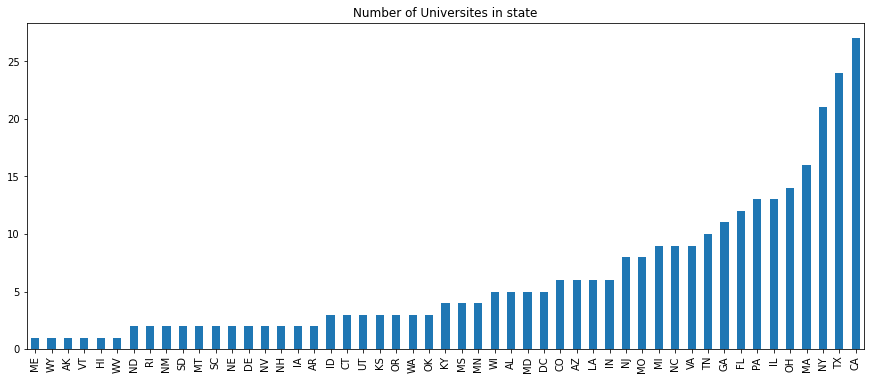

In [20]:
data.state.value_counts().sort_values().plot(kind='bar', figsize=(15,6), title='Number of Universites in state')
plt.show()

California is the state with the highest number of universities in our dataset

In [21]:
def plot_dist(data, name):
    '''
    function to make a distribution plot of given data
    
    args:
        data: data to plot
        
        name: descriptive name of the data
    '''
    
    fig, ax = plt.subplots(figsize=(7,5))
    sns.distplot(data, ax=ax)
    ax.set_title('Distribution of {}'.format(name))
    plt.show()

#### sat-avg

In [22]:
data['sat-avg'].describe()

count    291.000000 
mean     1044.027491
std      157.701571 
min      715.000000 
25%      930.000000 
50%      1010.000000
75%      1130.000000
max      1510.000000
Name: sat-avg, dtype: float64

From the table above, the mean SAT scores for universities in the united states is about 1000, with the highest above 1500 and lowest score being 715. The distribution seems like a normal distribution

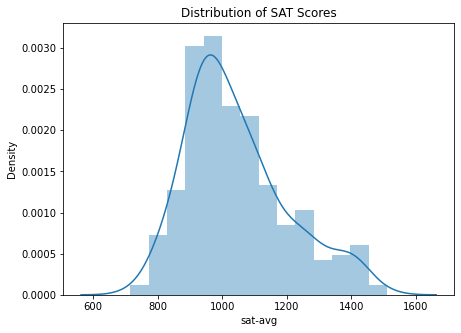

In [23]:
plot_dist(data['sat-avg'], 'SAT Scores')

The plot above, confirms otherwise that the distribution of the SAT scores is a little skewed to the right

#### percent-receiving-aid

In [24]:
data['percent-receiving-aid'].describe()

count    143.000000
mean     35.279720 
std      17.163426 
min      5.000000  
25%      21.000000 
50%      35.000000 
75%      47.000000 
max      81.000000 
Name: percent-receiving-aid, dtype: float64

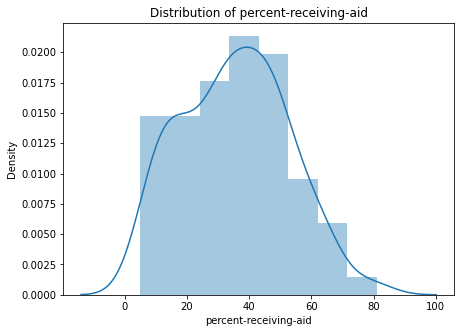

In [25]:
plot_dist(data['percent-receiving-aid'], 'percent-receiving-aid')

From the table and plot above, the percentage of university students receieving aid across the states shows a normal distribution

### Explore features by comparing between 2 states

In [26]:
def plot_features(data, y, x = 'index', states = ['Indiana', 'Colorado'], kind='lineplot'):
    '''
    funtion to plot features in the data of selected states.
    
    args:
        data: dataframe that contains features to be ploted.
        
        y: feature to be plotted on the y-axis.
        
        x: feature to be plotted on the x-axis (default is index).
        
        states: selected states to be included in visualization
        
        kind: type of plot to make, (lineplot or boxplot or scatterplot) 
    '''
    
    df = data[data['state'].isin(states)]
    x_values = getattr(df, x)
    y_values = getattr(df, y)
    
    if kind=='lineplot':
        fig, ax = plt.subplots(figsize=(8,5))
        sns.lineplot(x=x_values, y=y_values, data=df, ci=None, hue='state', ax=ax, marker='d')
        
    # Univariate Analysis
    elif kind=='boxplot':
        fig, axes = plt.subplots(1,2, figsize=(13,5))
        for ax, state in zip(axes, states):
            new_df = data[data['state']==state]
            sns.boxplot(new_df[y], ax=ax)
            ax.set_title('{} in {}'.format(y.title(),state))
        plt.show()
        return 
            
    else:
        fig, ax = plt.subplots(figsize=(8,5))
        sns.scatterplot(x=x_values, y=y_values, data=df, ci=None, hue='state', ax=ax)
    
    if x=='index':
        plt.title('{} of Universities'.format(y.title()))
    else:
        plt.title('{} vs {} of Universities'.format(x.title(), y.title()))
        
    plt.show()

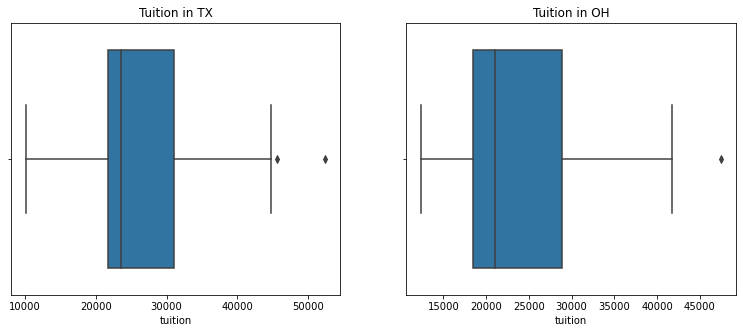

In [27]:
plot_features(data, y='tuition', kind='boxplot', states=['TX', 'OH'])  # Texas, Ohio

From the plots above, we see that the median tuition for universities in texas is higher than the median tuition of universities in ohio. </p>
However the cheapest and most expensive university of the 2 states is in texas because the tuition fee in texas is more widely spread. 
  

Multivariate Analysis

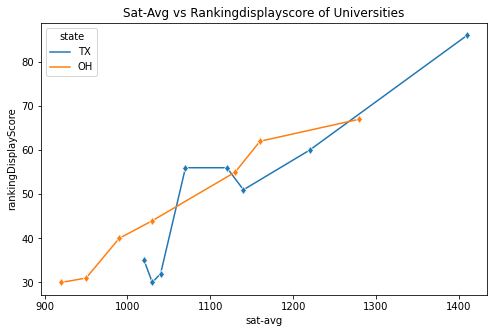

In [28]:
plot_features(data, x='sat-avg', y='rankingDisplayScore', kind='lineplot', states=['TX', 'OH']) # Texas, Ohio

There seems to be a positive correlation between the average SAT scores of university students and the ranking of the university

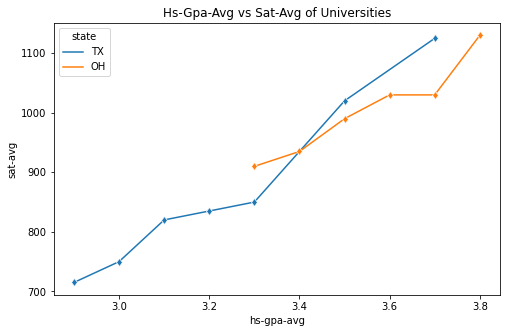

In [29]:
plot_features(data, x='hs-gpa-avg', y='sat-avg', kind='lineplot', states=['TX', 'OH']) # Texas,  Ohio

There's also a positive correlation between the average GPA scores of students in their high school and their average SAT scores

#### Distribution of Tuition and enrollment in Universities across the states.
- Determine the relationship between the tuition fee of a university and the number of enrolled students in the university..


#### Tuition

In [30]:
data['tuition'].describe()

count    311.000000  
mean     31121.340836
std      11995.242460
min      5460.000000 
25%      21949.000000
50%      28500.000000
75%      41255.000000
max      57208.000000
Name: tuition, dtype: float64

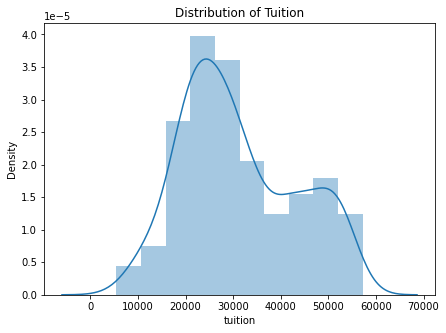

In [31]:
plot_dist(data['tuition'], 'Tuition')

Using histogram, the tuition data is divided into bins/categories

The distribution of tuition for universities in the US shows that the mode of tuition fee is about 25000

#### Enrollment

In [32]:
data['enrollment'].describe()

count    300.000000  
mean     14895.256667
std      10660.572830
min      133.000000  
25%      6428.000000 
50%      12104.500000
75%      21661.750000
max      55776.000000
Name: enrollment, dtype: float64

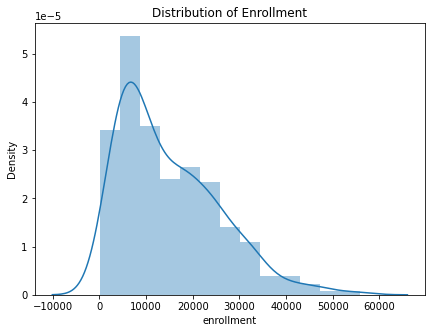

In [33]:
plot_dist(data['enrollment'], 'Enrollment')

The plot above tells that there are some universities with very low and very high number of enrollments when compared to the median of the data.

Moving forward to avoid an Undercoverage bias, I'll take samples from our dataset for analysis because some states like Texas have 20+ universities, while a state like Alaska has just one university from our dataset.

How I tackled this is to take a sample of n universities in each state

In [34]:
def sample_data_by_state(data, num, random_state=42):
    '''
    funtion to sample the data to avoid Undercoverage bias of universities in states.
    
    args:
        data: pandas dataframe
        
        num: exact number of universities that must be in each state for sampled data
    
    return:
        sample_df: dataframe that contains equal <num> of universities for each state. 
    '''
    
    value_counts = data['state'].value_counts()
    new_states = [j for i,j in zip(value_counts,value_counts.index) if i >= num]
    if len(new_states)<1:
        return
    new_df = data[data['state'].isin(new_states)]
    sample_df = new_df.groupby('state').apply(lambda x: x.sample(num, random_state=random_state))
    sample_df.reset_index(level=0, drop=True, inplace = True)
    
    return sample_df

In [35]:
ten_uni_df = sample_data_by_state(data, 10)

In [36]:
ten_uni_df.head(3)

,act-avg,sat-avg,enrollment,city,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,state,hs-gpa-avg,tuition,engineeringRepScore,displayName
46,26.0,1110.0,3542.0,Malibu,37.0,64.0,51.0,32416.0,CA,3.6,51992,NaN,Pepperdine University
112,23.0,1030.0,3483.0,Stockton,66.0,48.0,67.0,37188.0,CA,3.5,46346,2.9,University of the Pacific
47,24.0,1050.0,29546.0,Davis,42.0,64.0,9.0,44075.0,CA,4.0,42396,3.5,University of California--Davis


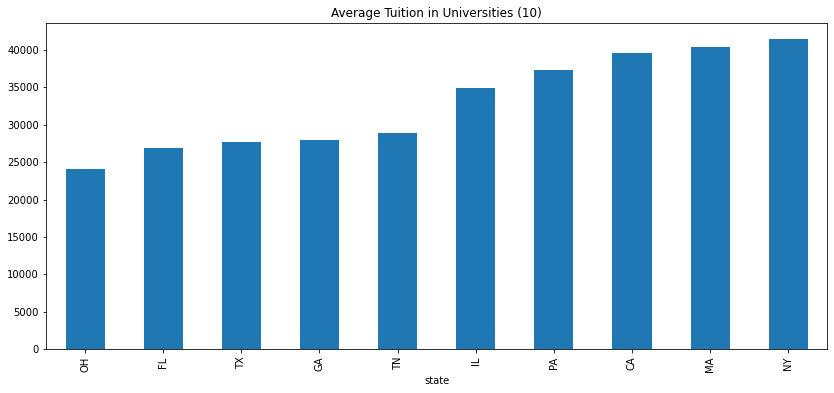

In [37]:
ten_uni_df.groupby(by=['state'])['tuition'].mean().sort_values().plot(kind='bar', figsize=(14,6))
plt.title('Average Tuition in Universities (10)')
plt.show()

From the chart above, We see that universities in New York have the highest average (40000) of Tuition in the united states from our balanced sample data

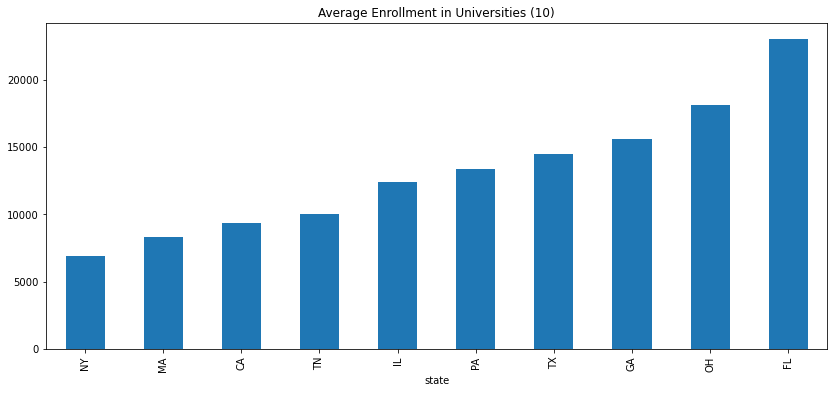

In [38]:
ten_uni_df.groupby(by=['state'])['enrollment'].mean().sort_values().plot(kind='bar', figsize=(14,6))
plt.title('Average Enrollment in Universities (10)')
plt.show()

How the tables have turned! .

<p> New york state universities have the lowest average enrollment, while Florida has the highest average enrollment of university students </p>

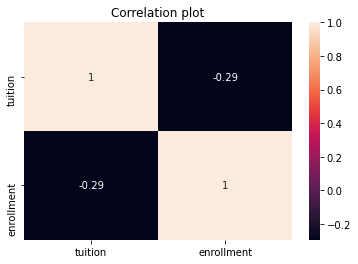

In [39]:
sns.heatmap(ten_uni_df[['tuition', 'enrollment']].corr(), annot=True)
plt.title('Correlation plot')
plt.show()

Well this heatmap above has confirmed the negative correlation between tuition and enrollment, however it's a weak negative correlation of - 0.3

#### Discover which state has universities with the lowest tuitions. 

In [40]:
data.tuition.describe()['25%']

21949.0

The 25% percentile of tuitions is the threshold I chose to determine if a university's tuition is low.

In [41]:
low_tuitions = data[data['tuition'] < data.tuition.describe()['25%']]['state']

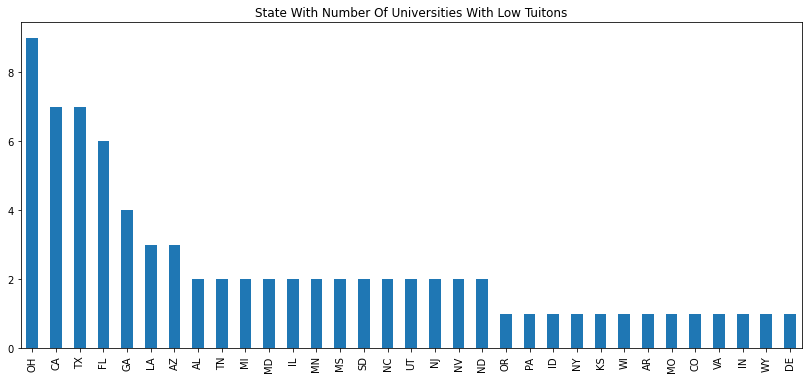

In [42]:
low_tuitions.value_counts().plot(kind='bar', figsize=(14,6))
plt.title('State with number of Universities with low tuitons'.title())
plt.show()

From the chart above, Ohio state has the highest number of universities with 'low' tuition.

9 Universities in Ohio have Tuition below the 25th percentile of all tuition fees of universities across united state

#### Identify top ranking universities where students receive aid.

In [43]:
data.rankingDisplayScore.describe()

count    230.000000
mean     50.465217 
std      18.084134 
min      27.000000 
25%      36.000000 
50%      47.000000 
75%      61.000000 
max      100.000000
Name: rankingDisplayScore, dtype: float64

If the rankingDisplayScore is greater than 80, then the university is top ranking

In [44]:
data['percent-receiving-aid'].describe()

count    143.000000
mean     35.279720 
std      17.163426 
min      5.000000  
25%      21.000000 
50%      35.000000 
75%      47.000000 
max      81.000000 
Name: percent-receiving-aid, dtype: float64

It's a good percentage if the percentage of university students receiving aid is at least 50%

In [45]:
top_ranking_with_good_aid = data.iloc[np.where( (data.rankingDisplayScore>80) & (data['percent-receiving-aid']>=50) )]

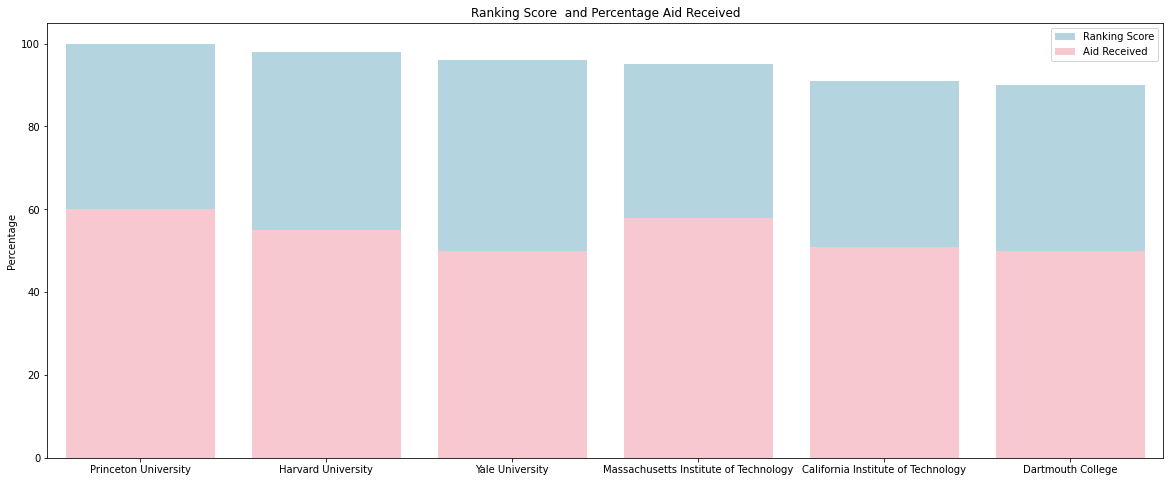

In [46]:
fig, ax = plt.subplots(figsize=(20,8))
plot1 = sns.barplot(x = 'displayName', y = 'rankingDisplayScore', data = top_ranking_with_good_aid,
                    color = 'lightblue', label='Ranking Score', ax=ax)
plot2 = sns.barplot(x = 'displayName', y = 'percent-receiving-aid', data = top_ranking_with_good_aid,
                    color = 'pink', label='Aid Received', ax=ax)
ax.set_ylabel('Percentage')
ax.set_xlabel(None)
ax.set_title('Ranking Score  and Percentage Aid Received')
plt.legend()

plt.show()

From the plot above we see the Universities that have at least 50% of students receiving aid and have well above 80 rank score.

Princeton University seems to have a perfect 100 rank score and 60% of her students receiving aid

#### Cluster universities into groups based on the average SAT scores of the students.

I will bin the sat-avg columns to create the clusters

In [47]:
data['sat-avg'].describe()

count    291.000000 
mean     1044.027491
std      157.701571 
min      715.000000 
25%      930.000000 
50%      1010.000000
75%      1130.000000
max      1510.000000
Name: sat-avg, dtype: float64

In [48]:
def bin_sat(score):
    '''
    function to create discrete class of SAT-scores
    '''
    
    if score < 1000:
        return 'low-score'
    elif 1000 <= score < 1200:
        return 'average-score'
    elif 1200 <= score <= 1600:
        return 'high-score'
    else: 
        return np.nan

In [49]:
data['sat-group'] = data['sat-avg'].apply(bin_sat)

In [50]:
data.groupby(by=['sat-group'])['sat-avg'].mean()

sat-group
average-score    1080.134615
high-score       1318.480000
low-score        916.452555 
Name: sat-avg, dtype: float64

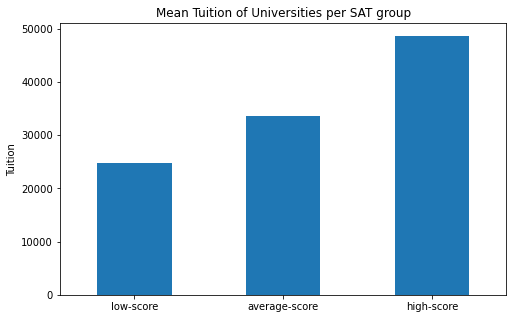

In [51]:
data.groupby(by=['sat-group'])['tuition'].mean().sort_values().plot(
    kind='bar', title='Mean Tuition of Universities per SAT group', figsize=(8,5))
plt.xticks(rotation=0)
plt.xlabel(None)
plt.ylabel('Tuition')
plt.show()

From the chart above, we see that students with high SAT scores are likely to go to universities with high tuition

### Visualize data using Maps

#### Import [Additional Data]('https://simplemaps.com/data/us-cities') 

In [52]:
geodata = pd.read_csv('uscities.csv', usecols=['city_ascii', 'lat', 'lng', 'state_name', 'state_id'])

In [53]:
geodata.head()

,city_ascii,state_id,state_name,lat,lng
0,New York,NY,New York,40.6943,-73.9249
1,Los Angeles,CA,California,34.1139,-118.4068
2,Chicago,IL,Illinois,41.8373,-87.6862
3,Miami,FL,Florida,25.7839,-80.2102
4,Dallas,TX,Texas,32.7936,-96.7662


#### Merge datasets using city and state

In [54]:


geo_df = pd.merge(data, geodata, left_on=['city','state'], right_on=['city_ascii','state_id'], how='left')

In [55]:
geo_df.dropna(subset=['lat','lng'], inplace=True)

In [56]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [57]:
import folium

In [58]:
map_osm = folium.Map(location=[40.4, -74.7], zoom_start=11)

In [59]:
map_osm

Base Folium map 

In [60]:
sat_group_to_color = {'low-score':'red', 'average-score': 'blue', 'high-score':'green'}

<p><b>Green</b>  represents universities that fell into the <b>high</b> sat-scores group. </p>
<p><b>Blue</b>  represents universities that fell into the <b>average</b> sat-scores group. </p>
<p><b>Red</b> represents universities that fell into the <b>low</b> sat-scores group. </p>

In [61]:
def plot_map(data, geo_map, states='all'):
    '''
    function to create interactive map of universities
    
    arg:
        data: pandas dataframe containing geographical data
        
        geo_map: Folium map object
        
        states: selected states to be included in visualization (default is all states)
    '''
    
    if states == 'all':
        pass   # Meaning to use all the states in the data
    else:
        data = data[data['state'].isin(states)]
    
    data['sat_group_color'] = data['sat-group'].map(sat_group_to_color)
    
    for index, row in data.iterrows():
        message = '{}, rank no: {}'.format(row['displayName'] ,row['rankingDisplayScore'])
        folium.Marker(location = [ row['lat'], row['lng'] ],
                     icon = folium.Icon(color=row['sat_group_color']),
                     popup=message).add_to(geo_map)
        
    sw = data[['lat', 'lng']].min().values.tolist()
    ne = data[['lat', 'lng']].max().values.tolist()
    geo_map.fit_bounds([sw, ne]) 
        
    if len(states) == 1:
        title = '{} State'.format(states[0])
    else:
        title = 'Specified States'
        
    title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(title)
    
    geo_map.get_root().html.add_child(folium.Element(title_html))

In [62]:
all_states_map = folium.Map(location=[40.4, -74.7], zoom_start=11)

In [63]:
plot_map(geo_df, all_states_map)

In [64]:
all_states_map

The map above shows the locations of universities in the united state

In [65]:
new_york_map = folium.Map(location=[40.4, -74.7], zoom_start=11)

In [66]:
plot_map(geo_df, new_york_map, states=['NY']) # New York

In [67]:
new_york_map

The map above shows the locations of universities in the New York state only

In [68]:
multi_map = folium.Map(location=[40.4, -74.7], zoom_start=11)

In [69]:
plot_map(geo_df, multi_map, states=['CA', 'AZ', 'NV'])  # ['California', 'Arizona', 'Nevada']

In [70]:
multi_map

The map above shows the locations of universities in 'California', 'Arizona', 'Nevada', States.